# Modeling the Future 2018

by Jeremy Margolin, Michael Klyachman, Liam Schumm, Elias O'Malley, and Jules Goduco-Bunting

In [1]:
import numpy as np
import pandas as pd
import scipy
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.formula.api as smf
sns.set()
import warnings
warnings.simplefilter('ignore',FutureWarning)

## Scenario Response Topic 1- Automobile Insurance

Answers are in *italics*.

In [2]:
insurance = pd.read_excel('Scenario-Response-1-Auto-Insurance-Data.xlsx')

**Question 1:** Estimate the probability that a Tonga owner has a loss during one year

*~9.87%*

In [3]:
tongas = insurance.groupby('Car Brand').get_group('Tonga')
tongas_percent_loss = 1 - (tongas.groupby('Loss').get_group(0).shape[0] / tongas.shape[0])
tongas_percent_loss

0.09872102318145481

**Question 2:** Estimate the loss on a policy, given that the policyholder owned a
Bergen.

*~$1100.36*

In [4]:
insurance.groupby('Car Brand').get_group('Bergen')['Loss'].mean()

1100.356084319945

**Question 3:** Do you see a relationship between Age and Loss, given a loss has occurred? If so, what type of relationship? What could be a logical reason for this trend?

*Yes. Given that loss has occured, young people lose on average 15% more money as old people. A logical reason for this trend is that young people are more careless and are less experienced drivers, therefore the accidents that they get in are worse.*

Text(0.5,1,'Mean Loss per Age Group')

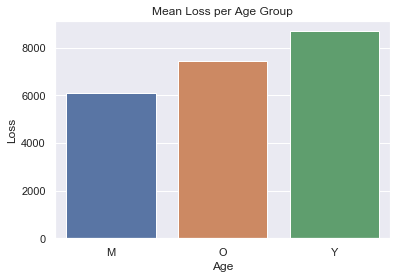

In [5]:
age_mean = insurance[insurance.Loss > 0].groupby('Age').mean()
sns.barplot(x=age_mean.index, y='Loss', data=age_mean).set_title('Mean Loss per Age Group')

In [6]:
losses = insurance[insurance.Loss > 0]
smf.ols('Loss ~ Age - 1', data=losses).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Loss   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     12.68
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           3.49e-06
Time:                        10:26:41   Log-Likelihood:                -13956.
No. Observations:                1347   AIC:                         2.792e+04
Df Residuals:                    1344   BIC:                         2.793e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Age[M]      6121.2834    392.646     15.590      0.000    5351.018    6891.549
Age[O]      7425.7139    368.257     20.164      0.000    6703.293    8148.135
Age[Y]      8697.2409    330.915     26.282      0.000    8048.076    9346.406
==============================================================================
Omnibus:                      634.540   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3790.198
Skew:                           2.141   Prob(JB):                         0.00
Kurtosis:                      10.013   Cond. No.                         1.19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question 4:** Do you see a relationship between gender and the frequency of a loss occurring?

*Males are ~2.2% more likely to have a loss (low p-value so this is statistically significant).*

Text(0.5,1,'Loss Frequency vs Gender')

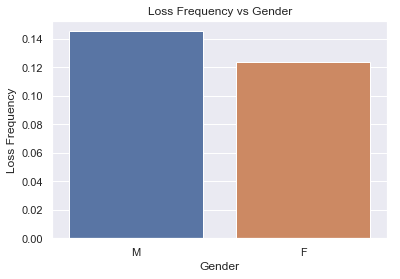

In [7]:
males = insurance.groupby('Gender').get_group('M')
females = insurance.groupby('Gender').get_group('F')
gender_lossfreq = pd.DataFrame({'Gender' : ['M', 'F'],
                                'Loss Frequency' : [males[males.Loss != 0].size / males.size,
                                                    females[females.Loss != 0].size / females.size]})
sns.barplot(x='Gender', y='Loss Frequency', data=gender_lossfreq).set_title('Loss Frequency vs Gender')

In [8]:
print('# of Male losses: ' + str(males[males.Loss != 0].shape[0])) 
print('# of Female losses: ' + str(females[females.Loss != 0].shape[0]))

# of Male losses: 728
# of Female losses: 619


In [9]:
insurance.groupby('Gender').mean().iloc[:, 1:2]

,Loss
Gender,
F,932.104907
M,1103.670467


In [10]:
loss_transform = np.vectorize(min)

In [11]:
insurance4 = insurance.copy()
insurance4['HasLoss'] = loss_transform(insurance4['Loss'], 1)
smf.ols('HasLoss ~ Gender - 1', data=insurance4).fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                HasLoss   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     10.20
Date:                Thu, 06 Dec 2018   Prob (F-statistic):            0.00141
Time:                        10:26:42   Log-Likelihood:                -3436.7
No. Observations:               10008   AIC:                             6877.
Df Residuals:                   10006   BIC:                             6892.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Gender[F]      0.1237      0.005     25.650      0.000       0.114       0.133
Gender[M]      0.1455      0.005     30.167      0.000       0.136       0.155
==============================================================================
Omnibus:                     3796.746   Durbin-Watson:                   1.965
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            10400.902
Skew:                           2.138   Prob(JB):                         0.00
Kurtosis:                       5.580   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Question 5:** Which car brand and gender combination has the least expected payout?

*Female with a Davis (lowest mean payout, payout is loss given that loss has occured)*

In [12]:
males[males.Loss > 0].groupby('Car Brand').mean().iloc[:, 1:2]

,Loss
Car Brand,
Bergen,7646.016782
Davis,6780.126582
Montes,7736.295132
Tonga,8372.143042


In [13]:
females[females.Loss > 0].groupby('Car Brand').mean().iloc[:, 1:2]

,Loss
Car Brand,
Bergen,7882.327546
Davis,6737.887209
Montes,7209.681824
Tonga,8656.186828


**Question 6:** What type of distribution does a Davis policyholder’s loss have, given that there is a loss? Graph the distribution and comment on its shape.

Text(0.5,1,'Probability Distribution of Losses on Davis Policies')

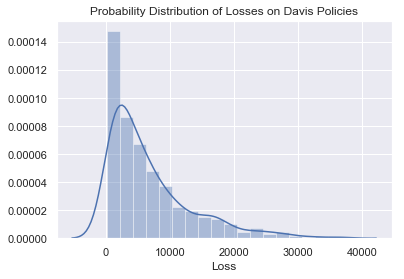

In [14]:
daviss = insurance.groupby('Car Brand').get_group('Davis')
sns.distplot(daviss[daviss.Loss > 0]['Loss']).set_title('Probability Distribution of Losses on Davis Policies')

*This looks most like an exponential distribution:*

<img src="https://www.itl.nist.gov/div898/handbook/eda/section3/gif/exppdf.gif">

**Question 7:** A family owns two cars, a Davis and a Tonga. What is the probability that exactly one of the policies will have a loss in the next year? The parents (middle-aged) drive the Tonga, while the children (young) drive the Davis.

*~21.32%*

In [15]:
young_davis_percent_loss = len(daviss[(daviss.Loss > 0) & (daviss.Age == 'Y')]) / len(daviss[daviss.Age == 'Y'])
mid_tongas_percent_loss = len(tongas[(tongas.Loss > 0) & (tongas.Age == 'M')]) / len(tongas[tongas.Age == 'Y'])

In [16]:
(young_davis_percent_loss * (1 - mid_tongas_percent_loss)) + ((1 - young_davis_percent_loss) * mid_tongas_percent_loss)

0.21317909701016163

**Question 8:** Joe, a 20-year old male is looking to buy insurance for a new Davis. His
quote is $1800 per year. Joe comes to you, and asks you to analyze the data to see
if the quote is higher than the expected amount that he would lose each year
without insurance. What is the expected loss per year? What additional value does
an insurance policy provide, if the expected loss is lower than the quote?

*Expected Loss Per Year: \$1387.91*

*If the expected loss is lower than the quote, this value is the expected amount a policy holder will have to pay on top of their deductible (quote) as the insurance company does not pay anything if this is true.*

In [17]:
insurance[(insurance['Car Brand'] == 'Davis') & (insurance['Gender'] == 'M') & (insurance['Age'] == 'Y')]['Loss'].mean()

1387.9104881888504

**Question 9:** Calculate the pure premium for a young male driving a Davis, using a
profit margin of 15% and fixed costs of $134 per policy holder. If we ignore
interest, pure premium of an insurable event equals the likelihood the event will
happen (called the frequency) multiplied by the insurer’s expected cost when the
event happens (called the severity). Interpret this number.

*The pure premium for a young male driving a Davis is about $448.82 if the company expects to make 15% profit on the pure premium and a \$134 fee is added on top of the pure premium amount.*

In [23]:
def get_mean_loss(brand, gender, age):
    return insurance[(insurance['Car Brand'] == brand) & (insurance['Gender'] == gender) & (insurance['Age'] == age)]['Loss'].mean()
def get_loss_freq(brand, gender, age):
    total = insurance[(insurance['Car Brand'] == brand) & (insurance['Gender'] == gender) & (insurance['Age'] == age)]
    loss = total[total.Loss > 0]
    return len(loss) / len(total)

In [19]:
pure_premium = get_loss_freq('Davis', 'M', 'Y') * get_mean_loss('Davis', 'M', 'Y')

In [27]:
(pure_premium + 134) * 1.15

448.822958583028

**Question 10:** Do you think an insurance company should use car brand, gender,
and age to determine a policyholder’s premium? What other variables can you
think of that might have an impact on expected loss, and why?

*Yes, insurance companies should use car brand, gender, and age to determine a policyholder's premium. Seeing as car insurance is mandatory for car ownership, lower risk drivers who have less of a chance of needing to make a claim (and therefore need less in claims) should not have to help cover for more accident-prone drivers covered by the same company.*

## Sources

- https://thismatter.com/money/insurance/rate-making.htm
- https://www.itl.nist.gov/div898/handbook/eda/section3/eda366.htm